In [205]:
import tensorflow as tf 
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import math
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [206]:
# loads and read csv file
df_original=pd.read_csv("Churn_Modelling.csv",delimiter=",")
df =df_original
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [208]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [209]:
# checks data types of columns
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [210]:
# checks for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [211]:
# checks for duplicate values
df.duplicated().sum()

0

In [212]:
# display column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [213]:
# display shape of the dataframe
df.shape

(10000, 14)

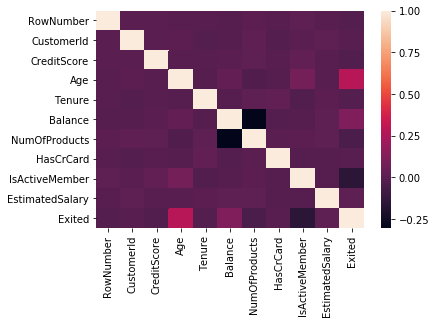

In [214]:
# checks correlation with all columns
corr=df.corr()
sb.heatmap(corr)

In [215]:
# checks correlation with all columns
print(corr['Exited'].sort_values(ascending=True)[:])

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64


In [216]:
# dropping columns whose relation is weak with label column
df.drop(['HasCrCard','Surname','CustomerId','RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [217]:
# return unique values in given column
df['Exited'].unique()

array([1, 0])

In [218]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

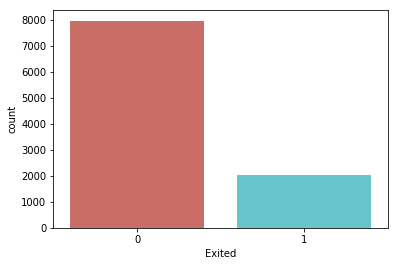

In [219]:
sb.countplot(x='Exited',data=df,palette='hls')

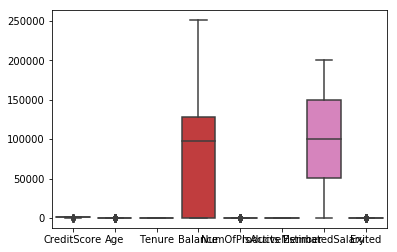

In [220]:
sb.boxplot(data=df)

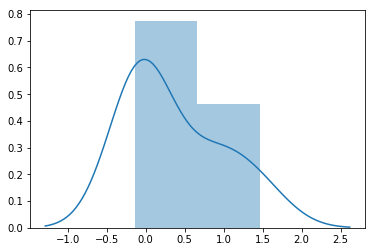

In [221]:
# display skewness of dataframe
target=df.skew()
sb.distplot(target)

In [222]:
df.shape

(10000, 10)

In [223]:
# convert categorical data into dummy (binary)  variables 
df=pd.get_dummies(df)

In [224]:
# split dataset into train and test
train,test=train_test_split(df,test_size=0.3)

In [225]:
train_data,cv_data=train_test_split(train,test_size=0.3)

In [226]:
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,-1:].values

In [227]:
x_train.shape,y_train.shape

((4900, 12), (4900, 1))

In [228]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)


array([[ 2.07522317e+00, -7.60667931e-01, -1.38658886e+00, ...,
        -5.92434613e-01, -5.71380228e-01, -9.13520064e-01],
       [-1.76534929e-02,  3.81791184e-01,  6.88741412e-01, ...,
        -5.92434613e-01, -5.71380228e-01,  1.09466671e+00],
       [-6.49660802e-01,  1.52425030e+00,  1.38051817e+00, ...,
        -5.92434613e-01, -5.71380228e-01, -9.13520064e-01],
       ...,
       [-1.00539697e-01,  9.71478839e-04, -6.94812106e-01, ...,
        -5.92434613e-01,  1.75014806e+00, -9.13520064e-01],
       [-1.37491509e+00,  1.61945522e+00,  1.38051817e+00, ...,
        -5.92434613e-01, -5.71380228e-01, -9.13520064e-01],
       [ 1.67115292e+00, -8.55872857e-01,  3.42853032e-01, ...,
        -5.92434613e-01, -5.71380228e-01, -9.13520064e-01]])

In [229]:
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,-1:].values

In [230]:
x_cv.shape,y_cv.shape

((2100, 12), (2100, 1))

In [231]:
sc.transform(x_cv)

array([[-1.13661725, -1.61751227, -0.34892373, ..., -0.59243461,
        -0.57138023, -0.91352006],
       [-0.44244529, -0.37984823, -1.04070049, ..., -0.59243461,
        -0.57138023, -0.91352006],
       [ 0.55218916, -0.37984823, -0.00303535, ...,  1.68794999,
        -0.57138023, -0.91352006],
       ...,
       [ 0.50038528,  0.57220104, -0.00303535, ..., -0.59243461,
         1.75014806, -0.91352006],
       [-0.61857847, -0.85587286, -0.69481211, ..., -0.59243461,
         1.75014806, -0.91352006],
       [-0.44244529, -1.04628271, -1.38658886, ..., -0.59243461,
         1.75014806, -0.91352006]])

In [232]:
# y_train=y_train.reshape(4900,1)
# y_cv=y_cv.reshape(2100,1)

In [233]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

n_classes = 2
batch_size = 100
alpha=0.001

x = tf.placeholder('float', [None, 12])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([12, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases']

    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer(alpha).minimize(cost)
    
    hm_epochs = 10
    
    # create saver object
    saver = tf.train.Saver()
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(10):
                _, c = sess.run([optimizer, cost], feed_dict={x: x_train, y: y_train})
#                 _, c = sess.run([optimizer, cost], feed_dict={x: x_cv, y: y_cv})
                
                epoch_loss += c

            print('Epoch', epoch+1, 'completed out of',hm_epochs,'loss:',epoch_loss)
        
        # save the variable in the disk
        saved_path = saver.save(sess, './saved_variable')
        print('model saved in {}'.format(saved_path))
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
#         correct1 = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_cv, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:x_train, y:y_train})*100)
        print('Accuracy:',accuracy.eval({x:x_cv, y:y_cv})*100)
        

train_neural_network(x)

Epoch 1 completed out of 10 loss: 3165179176.0
Epoch 2 completed out of 10 loss: 1068534440.0
Epoch 3 completed out of 10 loss: 491927551.0
Epoch 4 completed out of 10 loss: 266748045.0
Epoch 5 completed out of 10 loss: 93782315.0
Epoch 6 completed out of 10 loss: 43324509.5
Epoch 7 completed out of 10 loss: 76341831.75
Epoch 8 completed out of 10 loss: 78937649.75
Epoch 9 completed out of 10 loss: 72344929.0
Epoch 10 completed out of 10 loss: 117773317.5
model saved in ./saved_variable
Accuracy: 97.53060936927795
Accuracy: 97.3809540271759
